#     Plot latitude and longitude curtain plots


## Setup imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import notebook_prepare as pre

## Define plotting function

In [2]:
def create_plot(x_data, alt_data, data, diff, min, max, label, x_label, model) :

    # Define the figure.
    fig = plt.figure(figsize=(25,15))
    ax0 = fig.add_subplot(1,3,1)

    # Plot the aircraft data.
    plt0 = ax0.scatter(x_data,alt_data,c=data['a_avg'],marker='X',s=100,cmap=plt.cm.Spectral_r,vmin=min,vmax=max)
    if not(model): ax0.set_xlabel(x_label,fontsize=40,labelpad=20)
    ax0.set_ylabel('Altitude / m',fontsize=40,labelpad=20)
    ax0.tick_params(labelsize=30)
    ax0.grid()
    ax0.set_title('Aircraft',fontsize=40)
    cb0 = plt.colorbar(plt0,ax=ax0,orientation='vertical',pad=0.1,extend='both')
    cb0.set_label(label,fontsize=30,labelpad=10)
    cb0.ax.tick_params(labelsize=20)

    if(model):
        # Plot the model data.
        ax1 = fig.add_subplot(1,3,2)
        plt1 = ax1.scatter(x_data,alt_data,c=data['m_avg'],marker='X',s=100,cmap=plt.cm.Spectral_r,vmin=min,vmax=max)
        ax1.set_xlabel(x_label,fontsize=40,labelpad=20)
        ax1.tick_params(left=False,labelleft=False,labelsize=30)
        ax1.grid()
        ax1.set_title('Model',fontsize=40)
        cb1 = plt.colorbar(plt1,ax=ax1,orientation='vertical',pad=0.1,extend='both')
        cb1.set_label(label,fontsize=30,labelpad=10)
        cb1.ax.tick_params(labelsize=20)

        ax2 = fig.add_subplot(1,3,3)
        # Plot the difference data.
        plt2 = ax2.scatter(x_data,alt_data,c=diff['data'],marker='X',s=100,cmap=plt.cm.RdBu_r,vmin=diff['min_lim'],vmax=diff['max_lim'])
        ax2.tick_params(left=False,labelleft=False,labelsize=30)
        ax2.grid()
        ax2.set_title('Difference',fontsize=40)
        cb2 = plt.colorbar(plt2,ax=ax2,orientation='vertical',pad=0.1,extend='both')
        cb2.set_label(label+' (Model - Observation)',fontsize=30,labelpad=10)
        cb2.ax.tick_params(labelsize=20)

    plt.show()

In [3]:
def plot_curtain(df,plotdir,key,label, model) :

    # Define the data.
    alt_data = df['Altitude'][:]
    lat_data = df['Latitude'][:]
    lon_data = df['Longitude'][:]
    data = pre.read_data_values(df, model)
    diff = {}
    
    # Calculate the minimum and maximum limits.
    if(model):
        min = np.nanmin([np.nanmin(data['a_avg']),np.nanmin(data['m_avg'])])
        max = np.nanmax([np.nanmax(data['a_avg']),np.nanmax(data['m_avg'])])
        
        # Calculate the difference between model and observations.
        diff['data'] = [x-y for x,y in zip(data['m_avg'],data['a_avg'])]

        # Determine the min and max.
        diff_min = np.nanmin(diff['data'])
        diff_max = np.nanmax(diff['data'])
        limits = np.sqrt(np.nanmax([diff_min**2,diff_max**2]))
        diff['min_lim'] = limits*-1
        diff['max_lim'] = limits
    
    else:
        min = np.nanmin(data['a_avg'])
        max = np.nanmax(data['a_avg']) 
 
    create_plot(lat_data, alt_data, data, diff, min, max, label, 'Latitude / degrees north', model)
    create_plot(lon_data, alt_data, data, diff, min, max, label, 'Longitude / degrees east', model)

## Specify the flight number & model data

In [4]:
# Set the flight number.
# Current valid options are M270, M296 and M302.
flight_number = 'M270'  

# Specify whether you have model data to plot.
model = False

## Prepare the data and plot for each pollution species

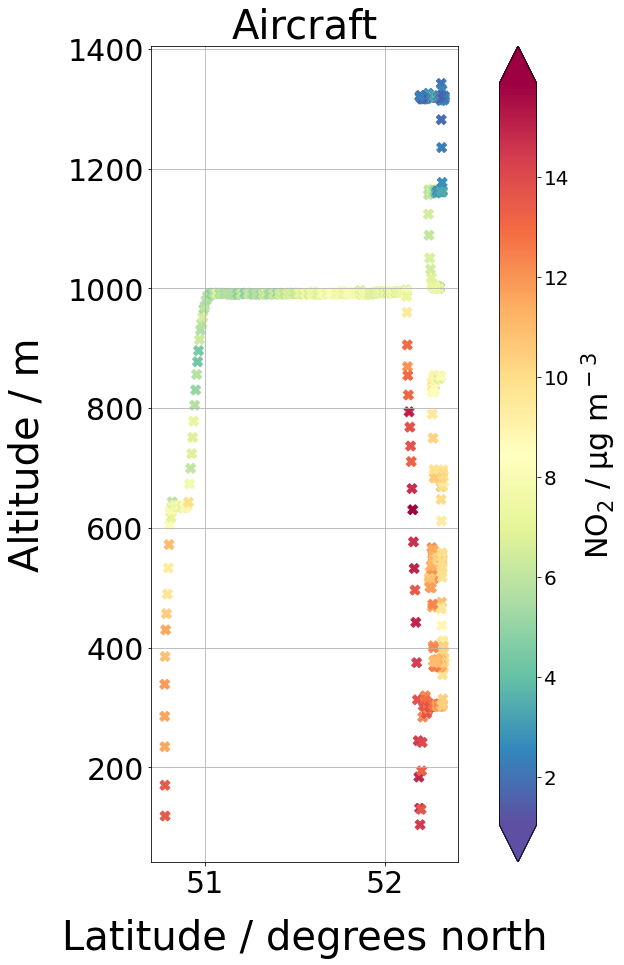

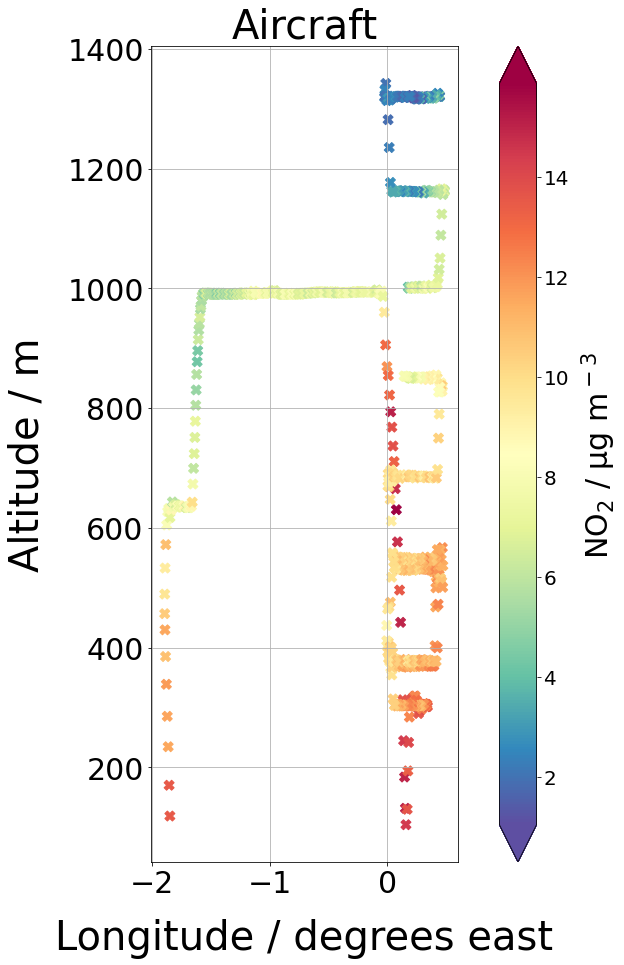

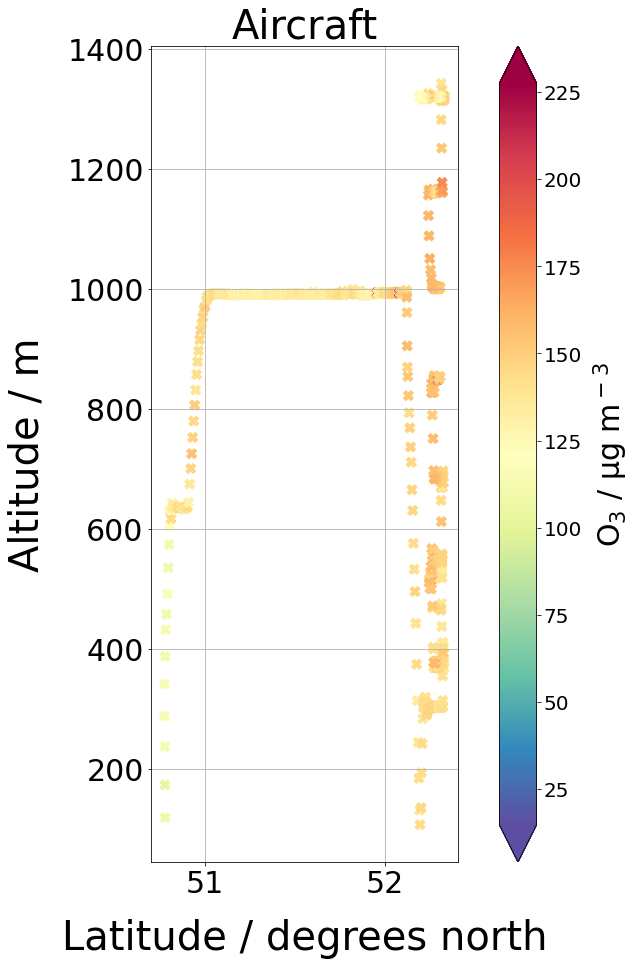

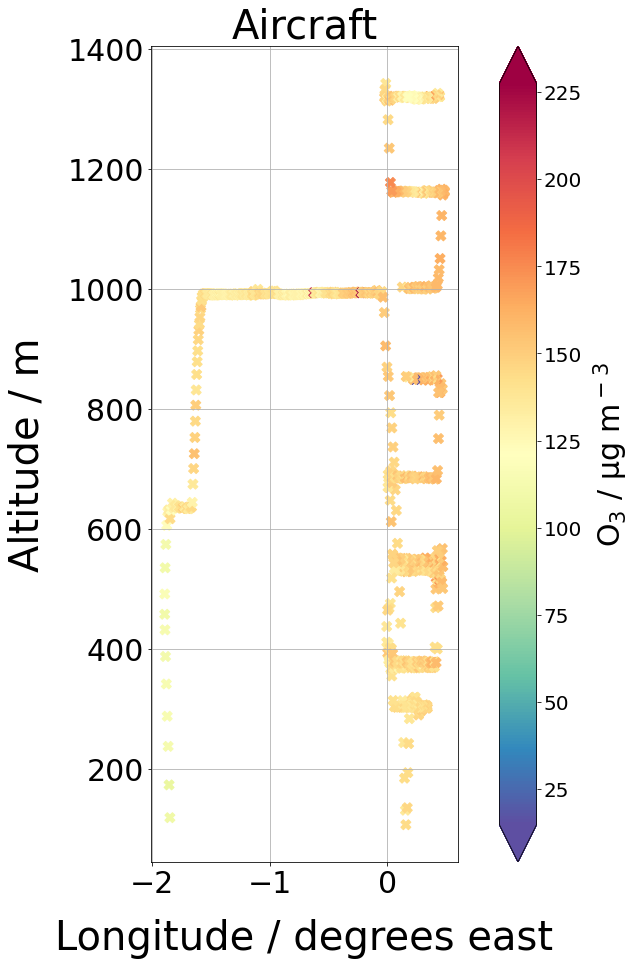

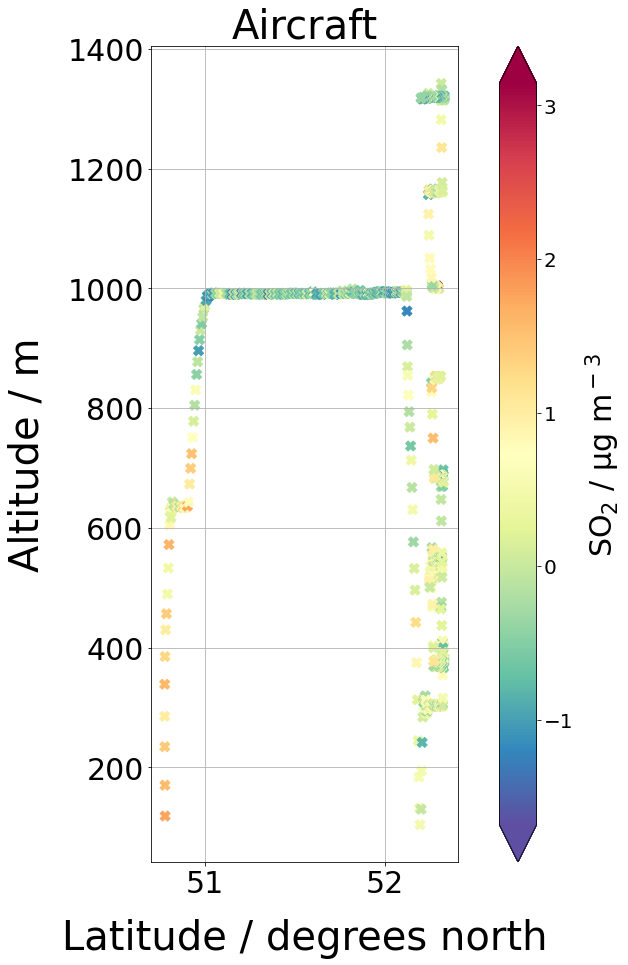

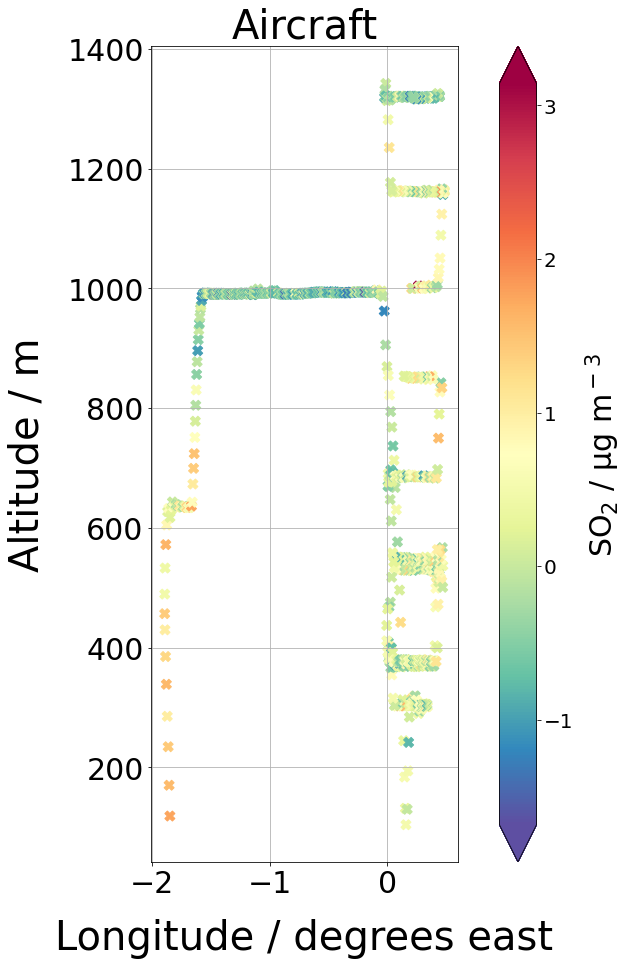

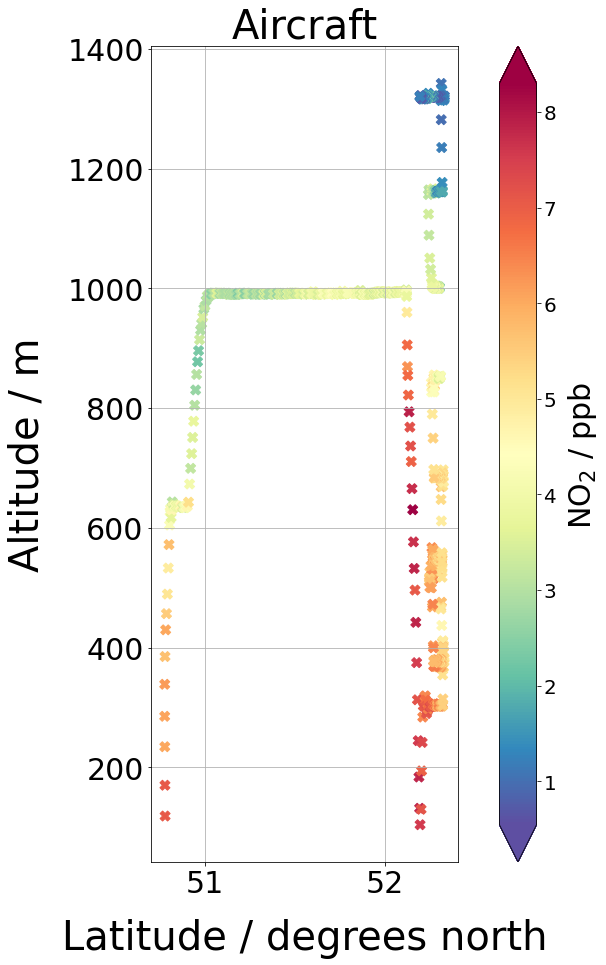

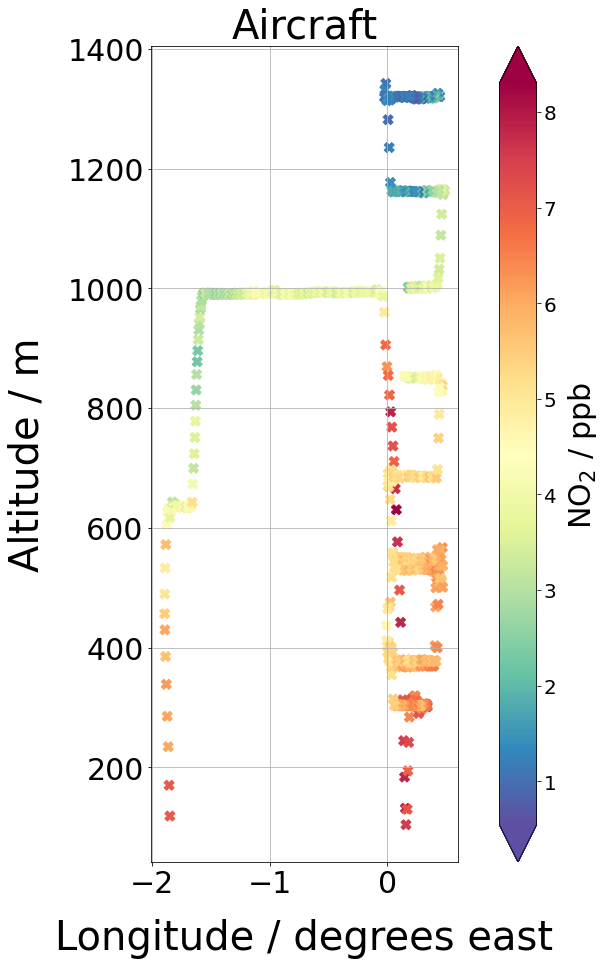

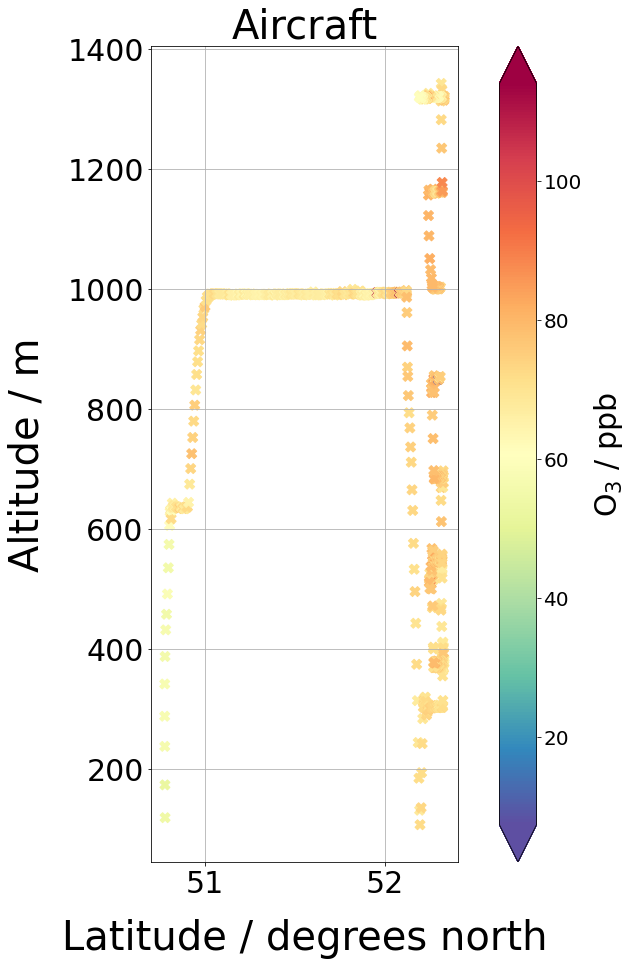

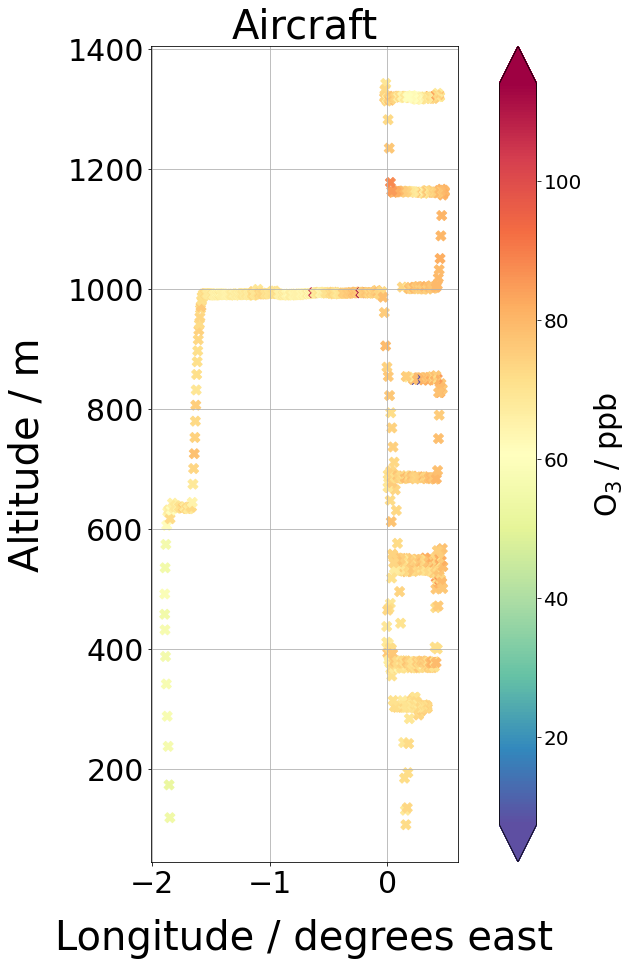

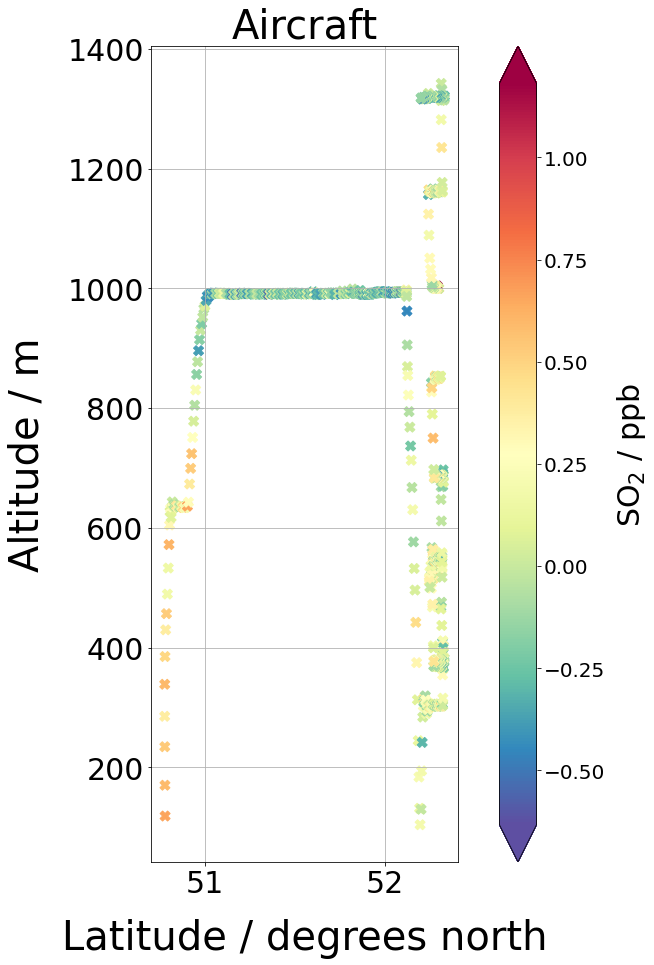

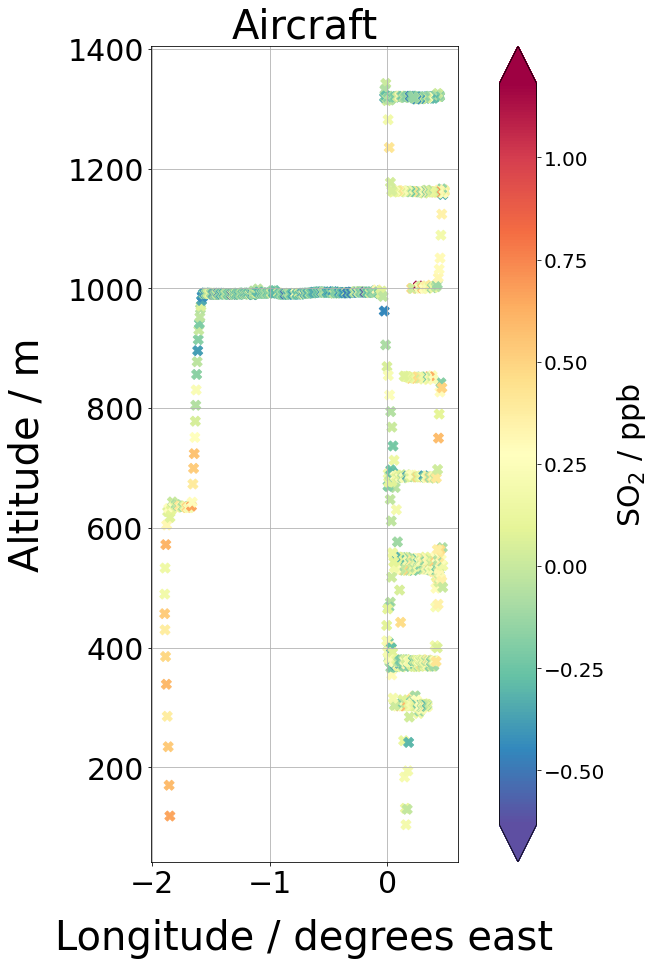

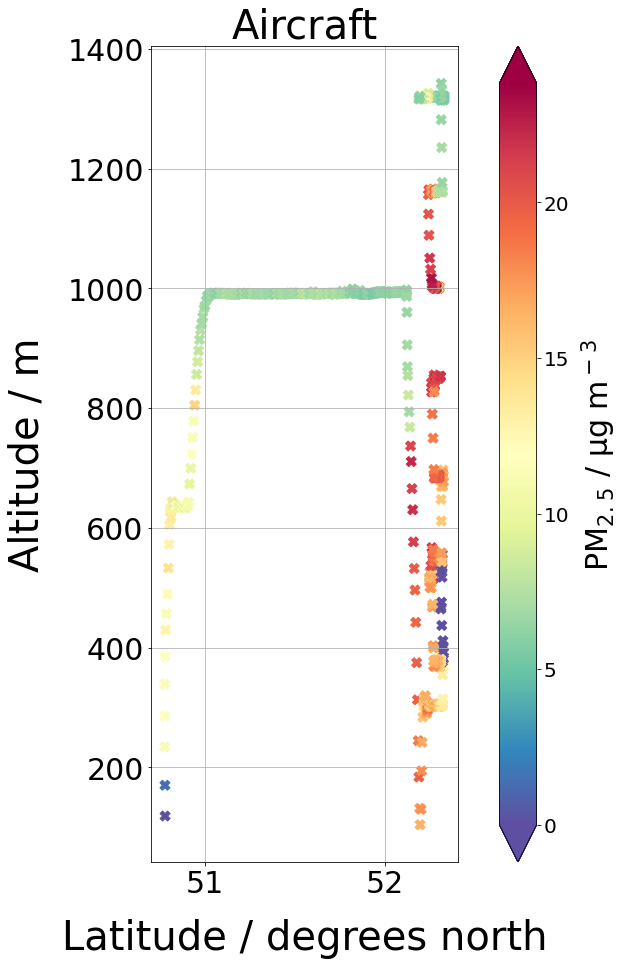

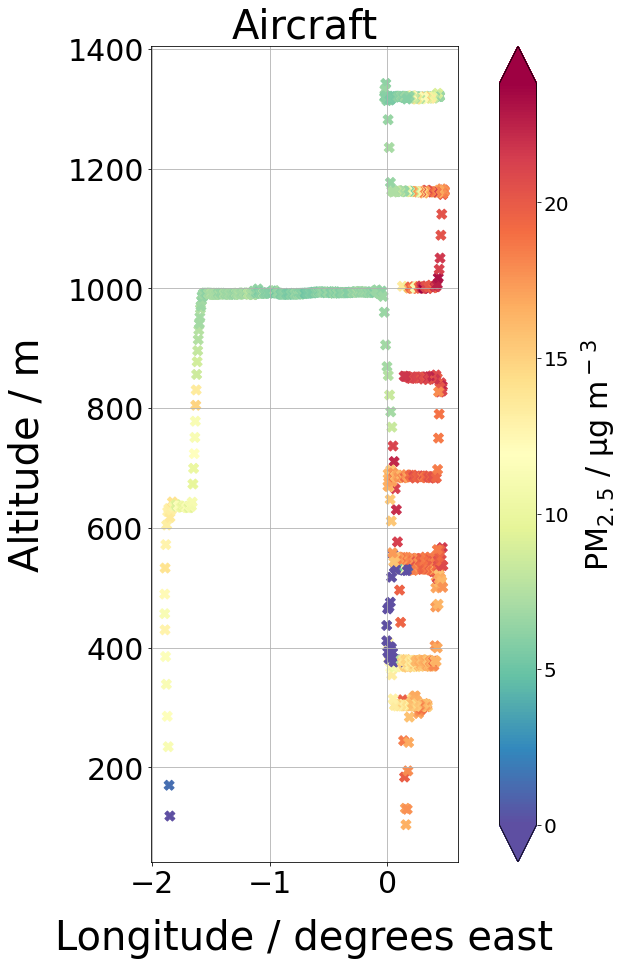

In [5]:
species_dict = pre.species_dictionary()
setup = pre.setup_notebook(flight_number, model)
optns = setup[4]
for key in species_dict.keys() :
    code,label,column_key,unit_conv = species_dict[key]['code'],species_dict[key]['label'],species_dict[key]['column_key'],species_dict[key]['unit_conv']

        # Combine the aircraft and model data.
    df = pre.combine_data(setup,code)

        # Resample the data.
    resample_df = pre.resample_data(df,optns['resample_time'],optns['avg_method'],optns['min_method'],optns['max_method'],model)
    
    plot_curtain(resample_df,setup[5],key,label,model)